**Reading the support ticket data**

In [2]:
import pandas as pd
import numpy as np
 
# Reading the data
TicketData=pd.read_csv("C:/Users/zarri/OneDrive/Documents/My Coding Project/NLP/supportTicketData.csv")
 
# Printing number of rows and columns
print(TicketData.shape)
 
# Printing sample rows
TicketData.head(10)

(19796, 2)


,body,urgency
0,connection issues with assigned address hi fac...,P1
1,cannot access hi cannot access fallowing link ...,P2
2,re address shown valid dear colleagues remarke...,P1
3,sent tuesday critical alert following alert oc...,P2
4,code spelling mistake hello should discover fo...,P2
5,annual leave hello sent last week about previo...,P2
6,report working hello dear last two weeks have ...,P2
7,more access lost access please reset password ...,P1
8,open credentials required please assist instal...,P1
9,dear please ask our supplier for price quotati...,P2


 **Visualising the distribution of the Target variable**

urgency
P1    6748
P2    5528
P3    7520
dtype: int64


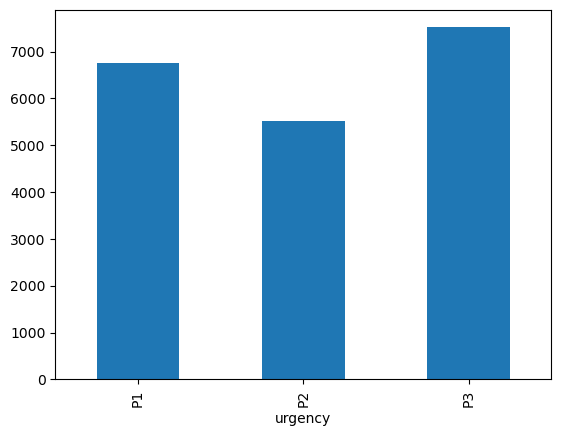

In [3]:
# Number of unique values for urgency column
# You can see there are 3 ticket types
print(TicketData.groupby('urgency').size())
 
# Plotting the bar chart
%matplotlib inline
TicketData.groupby('urgency').size().plot(kind='bar');

**TF-IDF Vectorization: converting text data to numeric**

In [5]:
# TF-IDF vectorization of text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
 
# Ticket Data
corpus = TicketData['body'].values
 
# Creating the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
DataForML=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
DataForML['Priority']=TicketData['urgency']
print(DataForML.shape)
DataForML.head()

(19796, 9100)


,ab,abandon,abandoned,abc,abeam,abilities,ability,able,abnormal,abnormally,...,zig,zip,zipped,zipper,zipping,zone,zones,zoom,zooming,Priority
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2


**Dimension Reduction**

[ 1.28  2.25  3.08 ... 95.36 95.36 95.36]


Text(0, 0.5, '% Variance explained')

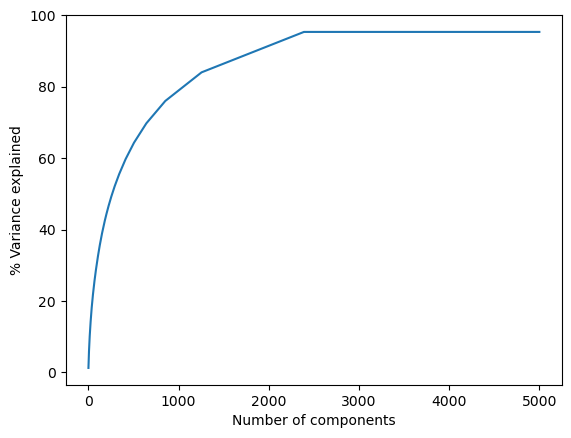

In [6]:
''' #### Dimension Reduction #### '''
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
 
# Subsetting data for X and y
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]
 
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values
 
# Trying maximum 5000 components 
# You need to choose any number which is less than the total number of columns in the original data
# I chose 5000 just to check if saturation happens before 5000 components or not.
NumComponents=5000
pca = PCA(n_components=NumComponents)
 
# fitting the data
pca_fit=pca.fit(X)
 
# calculating the principal components
reduced_X = pca_fit.transform(X)
 
 
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)
 
# Look for the elbow in the plot
plt.plot( range(1,len(var_explained_cumulative)+1), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [7]:
# Creating 2100 Principal components based on the above curve
NumComponents=2100
pca = PCA(n_components=NumComponents)
 
# fitting the data
pca_fit=pca.fit(X)
 
# calculating the principal components
reduced_X = pca_fit.transform(X)

**Using Principal Components as predictors**

In [8]:
# Equating reduced_X to X to let the other code run without changing everything
X=reduced_X
# Generating Predictor names
Predictors=pd.Series(['PC']*NumComponents).str.cat(pd.Series(range(1,NumComponents+1)).apply(str)).values
Predictors

array(['PC1', 'PC2', 'PC3', ..., 'PC2098', 'PC2099', 'PC2100'],
      dtype=object)

**Standardization/Normalization of the data**

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization is needed as we are fitting Naive Bayes
 
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
 
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13857, 2100)
(13857,)
(5939, 2100)
(5939,)


**Training ML classification models**

But, this data is high dimensional even after dimension reduction! If you pass this data of 2100 columns to any of these algorithms then, it will take a while before it finishes training and if you are using your humble laptop CPU, it may even hang it!

So, while keeping the training speed in mind. I select below algorithms.

Naive bayes
Logistic Regression
Decision Trees

**Naive Bayes**

In [10]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB
 
# GaussianNB is preferred in Binomial Classification
# MultinomialNB is preferred in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()
 
# Printing all the parameters of Naive Bayes
print(clf)
 
# Generating the Naive Bayes model
NB=clf.fit(X_train,y_train)
 
# Generating predictions on testing data
prediction=NB.predict(X_test)
 
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData[TargetVariable]=y_test
TestingData['Prediction']=prediction
print(TestingData.head())
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score
 
## Running 10-Fold Cross validation on a given algorithm
## Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(NB, X , y, cv=5, scoring='f1_weighted')
#print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.170558  0.305704  0.320970  0.377645  0.300440  0.512070  0.328977   
1  0.059201  0.601946  0.716625  0.346003  0.197000  0.510065  0.323403   
2  0.169765  0.369158  0.204437  0.341261  0.279360  0.344128  0.309593   
3  0.163876  0.341312  0.193034  0.424293  0.302156  0.433852  0.399580   
4  0.192141  0.266889  0.231490  0.357927  0.278806  0.429476  0.451059   

        PC8       PC9      PC10  ...    PC2093    PC2094    PC2095    PC2096  \
0  0.475587  0.417384  0.370245  ...  0.509103  0.456049  0.443558  0.477573   
1  0.371535  0.366961  0.375005  ...  0.558946  0.469076  0.475931  0.465573   
2  0.537349  0.394151  0.405068  ...  0.503550  0.513828  0.461349  0.454634   
3  0.560354  0.423645  0.362899  ...  0.570620  0.480616  0.477841  0.473685   
4  0.565867  0.436759  0.322583  ...  0.529078  0.357434  0.405514  0.464574   

     PC2097    PC2098    PC2099    PC2100  Priority  Pr

**Logistic Regression**

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')
 
# Printing all the parameters of logistic regression
# print(clf)
 
# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
 
# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData[TargetVariable]=y_test
TestingData['Prediction']=prediction
print(TestingData.head())
 
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))
 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score
 
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.170558  0.305704  0.320970  0.377645  0.300440  0.512070  0.328977   
1  0.059201  0.601946  0.716625  0.346003  0.197000  0.510065  0.323403   
2  0.169765  0.369158  0.204437  0.341261  0.279360  0.344128  0.309593   
3  0.163876  0.341312  0.193034  0.424293  0.302156  0.433852  0.399580   
4  0.192141  0.266889  0.231490  0.357927  0.278806  0.429476  0.451059   

        PC8       PC9      PC10  ...    PC2093    PC2094    PC2095    PC2096  \
0  0.475587  0.417384  0.370245  ...  0.509103  0.456049  0.443558  0.477573   
1  0.371535  0.366961  0.375005  ...  0.558946  0.469076  0.475931  0.465573   
2  0.537349  0.394151  0.405068  ...  0.503550  0.513828  0.461349  0.454634   
3  0.560354  0.423645  0.362899  ...  0.570620  0.480616  0.477841  0.473685   
4  0.565867  0.436759  0.322583  ...  0.529078  0.357434  0.405514  0.464574   

     PC2097    PC2098    PC2099    PC2100  Priority  Prediction  
0 

**Decision Trees**

DecisionTreeClassifier(max_depth=5)
              precision    recall  f1-score   support

          P1       0.55      0.73      0.63      2006
          P2       0.49      0.25      0.33      1653
          P3       0.84      0.89      0.86      2280

    accuracy                           0.66      5939
   macro avg       0.63      0.62      0.61      5939
weighted avg       0.64      0.66      0.64      5939

[[1468  328  210]
 [1052  417  184]
 [ 145  111 2024]]
Accuracy of the model on Testing Sample Data: 0.64


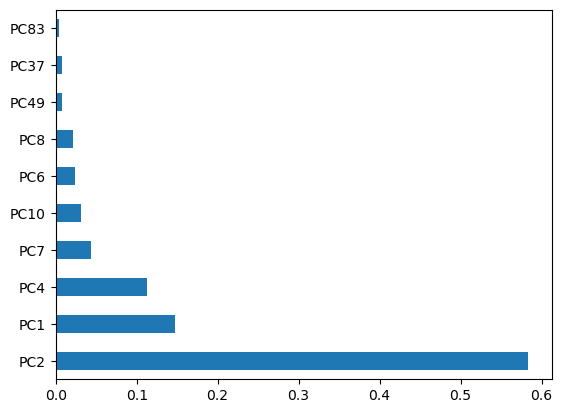

In [12]:
# Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=5,criterion='gini')
 
# Printing all the parameters of Decision Trees
print(clf)
 
# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
 
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
 
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Training the best model on Full Data**

In [13]:
# Generating the Logistic Regression model on full data
# This is the best performing model
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')
FinalModel=clf.fit(X,y)

**Making predictions for New Cases**

In [14]:
# Defining a function which converts words into numeric vectors for prediction
def FunctionPredictUrgency(inpText):
    
    # Using the same vectorizer converting the text to numeric vector
    X=vectorizer.transform(inpText)
    #print(X.toarray())
 
    # calculating the principal components
    reduced_X = pca_fit.transform(X.toarray())
    
    # If standardization/normalization was done on training
    # then the above X must also be converted to same platform
    # Generating the normalized values of X
    X=PredictorScalerFit.transform(reduced_X)
    
    # Generating the prediction using Naive Bayes model and returning
    Prediction=FinalModel.predict(X)
    Result=pd.DataFrame(data=inpText, columns=['Text'])
    Result['Prediction']=Prediction
    return(Result)

In [15]:
# Calling the function
NewTicket=["system down please restart it", "Please help to resolve system issue","Hello how are you?"]
PredictionResults=FunctionPredictUrgency(inpText=NewTicket)
PredictionResults

,Text,Prediction
0,system down please restart it,P1
1,Please help to resolve system issue,P1
2,Hello how are you?,P3


**Saving the output as a file**

In [16]:
# Saving the results as a csv file
PredictionResults.to_csv("C:/Users/zarri/OneDrive/Documents/My Coding Project/NLP/PredictionResults.csv",index=False)